# Загрузка данных

Данные взяты с сайта kaggle
[пользователи Netflix](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)

In [1]:
import pandas as pd
df = pd.read_csv('/content/netflix_users_data14.csv')
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


# Приведение столбцов к стилю camel_case

In [2]:
import re

def to_camel_case(column_name):
    # Разделяем слова по пробелам, подчеркиваниям и дефисам
    words = re.split(r'[_\s-]+', column_name)
    # Первое слово с маленькой буквы, остальные с заглавной
    if len(words) == 0:
        return column_name
    return words[0].lower() + ''.join(word.capitalize() for word in words[1:])

# Приводим все столбцы к camelCase
df.columns = [to_camel_case(col) for col in df.columns]
print(df.columns)

Index(['userId', 'subscriptionType', 'monthlyRevenue', 'joinDate',
       'lastPaymentDate', 'country', 'age', 'gender', 'device',
       'planDuration'],
      dtype='object')


# Приведение типов данных

In [3]:
#привести дату к типу datetime

df['joinDate'] = pd.to_datetime(df['joinDate'], format='%d-%m-%y', errors='coerce')
df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'], format='%d-%m-%y', errors='coerce')
df['planDuration'] = df['planDuration'].str.extract('(\d+)').astype(int)
df

,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1


# Поиск дублей и пропусков в данных

In [4]:
df_clean = df.drop_duplicates()
# Удаление строк с любыми пропущенными значениями
df_clean = df_clean.dropna()
print(f"Было строк: {len(df)}")
print(f"Осталось строк: {len(df_clean)}")
print(f"Удалено записей: {len(df) - len(df_clean)}")
df = df_clean

Было строк: 2500
Осталось строк: 2500
Удалено записей: 0


# Исследовательский анализ данных

In [5]:
df

,userId,subscriptionType,monthlyRevenue,joinDate,lastPaymentDate,country,age,gender,device,planDuration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1


In [6]:
# сколько уникальных пользователей?

# Подсчет уникальных заказов
unique_orders_count = df['userId'].nunique()
print(f"Количество уникальных заказов: {unique_orders_count}")

Количество уникальных заказов: 2500


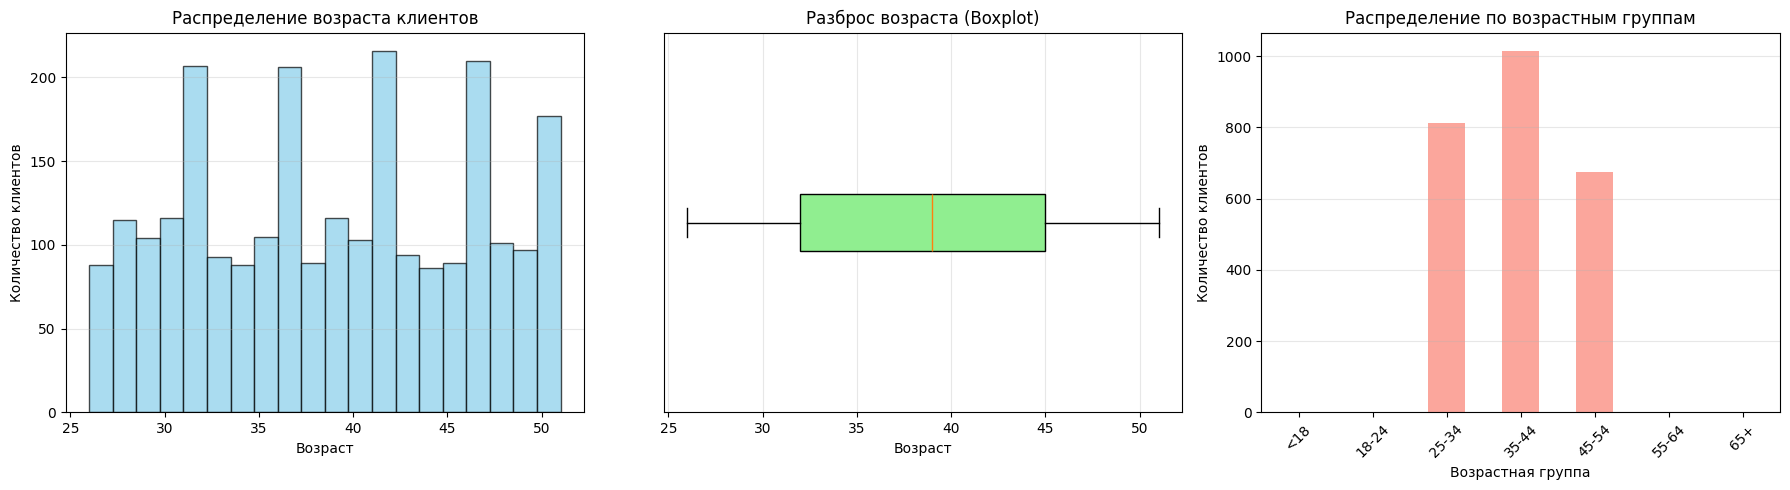

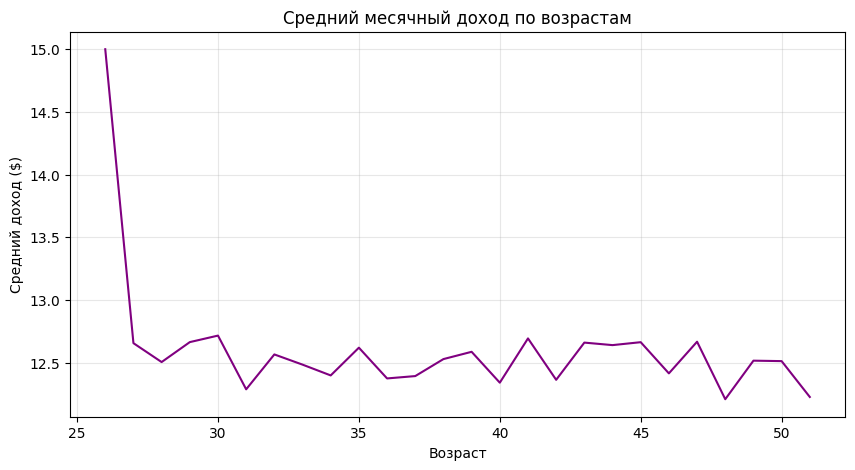

In [7]:
# изучить возраст пользователей (визуализировать)

import matplotlib.pyplot as plt
import numpy as np

# Создаем фигуру с 3 графиками
plt.figure(figsize=(18, 5))

# 1. Гистограмма распределения возраста
plt.subplot(1, 3, 1)
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.grid(axis='y', alpha=0.3)

# 2. Boxplot возраста
plt.subplot(1, 3, 2)
plt.boxplot(df['age'], vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightgreen'))
plt.title('Разброс возраста (Boxplot)')
plt.xlabel('Возраст')
plt.yticks([])
plt.grid(axis='x', alpha=0.3)

# 3. Распределение по возрастным группам
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

age_group_counts = df['age_group'].value_counts().sort_index()
plt.subplot(1, 3, 3)
age_group_counts.plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Распределение по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительно: средний доход по возрастам
plt.figure(figsize=(10, 5))
df.groupby('age')['monthlyRevenue'].mean().plot(color='purple')
plt.title('Средний месячный доход по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Средний доход ($)')
plt.grid(alpha=0.3)
plt.show()

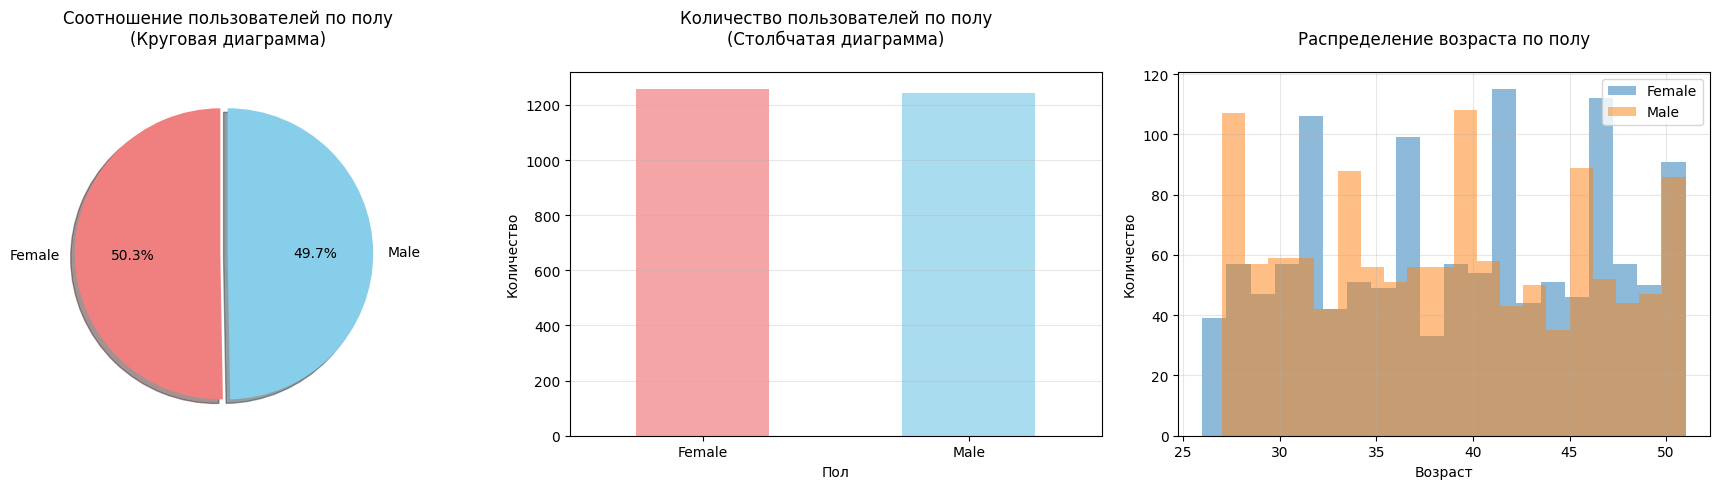

Статистика по полу пользователей:
gender
Female    1257
Male      1243
Name: count, dtype: int64

Средний возраст:
gender
Female    39.077963
Male      38.510056
Name: age, dtype: float64


<Figure size 1000x500 with 0 Axes>

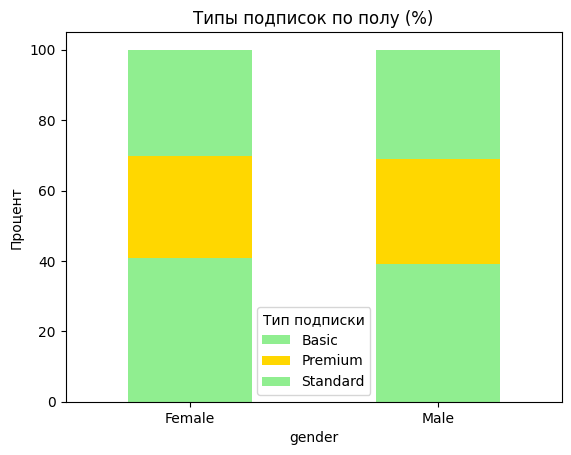

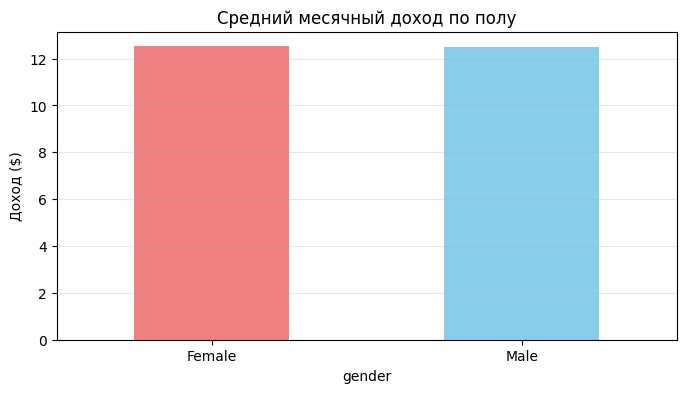

In [ ]:
# изучить пол пользователей (визуализировать)

# 1. Подготовка данных
gender_counts = df['gender'].value_counts()

# 2. Создание фигуры с 3 типами визуализаций
plt.figure(figsize=(18, 5))

# График 1: Круговая диаграмма
plt.subplot(1, 3, 1)
plt.pie(gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',
        colors=['lightcoral', 'skyblue'],
        startangle=90,
        shadow=True,
        explode=(0.05, 0))
plt.title('Соотношение пользователей по полу\n(Круговая диаграмма)', pad=20)

# График 2: Столбчатая диаграмма
plt.subplot(1, 3, 2)
gender_counts.plot(kind='bar', color=['lightcoral', 'skyblue'], alpha=0.7)
plt.title('Количество пользователей по полу\n(Столбчатая диаграмма)', pad=20)
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# График 3: Распределение по полу с разбивкой по возрасту
plt.subplot(1, 3, 3)
for gender in gender_counts.index:
    subset = df[df['gender'] == gender]
    plt.hist(subset['age'], bins=20, alpha=0.5, label=gender)
plt.title('Распределение возраста по полу', pad=20)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Дополнительная аналитика
print("Статистика по полу пользователей:")
print(gender_counts)
print("\nСредний возраст:")
print(df.groupby('gender')['age'].mean())

# Распределение по полу и типу подписки
subscription_by_gender = pd.crosstab(df['gender'], df['subscriptionType'], normalize='index') * 100

plt.figure(figsize=(10, 5))
subscription_by_gender.plot(kind='bar', stacked=True, color=['lightgreen', 'gold'])
plt.title('Типы подписок по полу (%)')
plt.ylabel('Процент')
plt.xticks(rotation=0)
plt.legend(title='Тип подписки')
plt.show()

# Средний доход по полу
plt.figure(figsize=(8, 4))
df.groupby('gender')['monthlyRevenue'].mean().plot(kind='bar', color=['lightcoral', 'skyblue'])
plt.title('Средний месячный доход по полу')
plt.ylabel('Доход ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

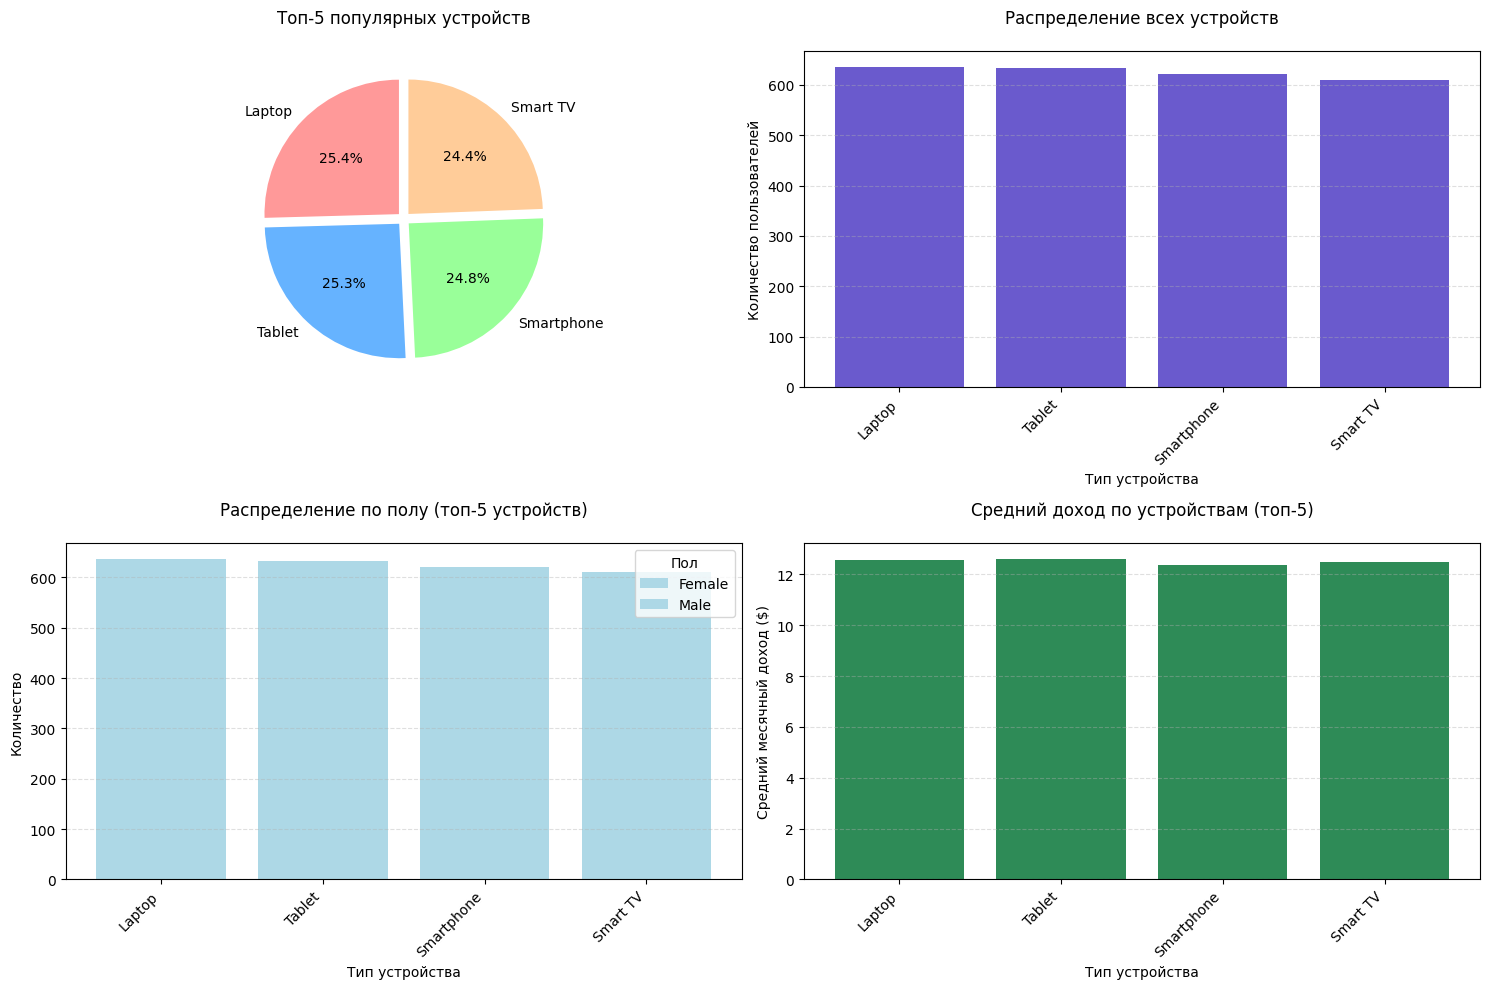


Топ-5 устройств по количеству пользователей:
device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

Средний доход по устройствам:
device
Tablet        12.592417
Laptop        12.569182
Smart TV      12.483607
Smartphone    12.384863
Name: monthlyRevenue, dtype: float64

Средний возраст пользователей по устройствам:
device
Smart TV      38.693443
Tablet        38.720379
Smartphone    38.726248
Laptop        39.036164
Name: age, dtype: float64


<Figure size 1200x800 with 0 Axes>

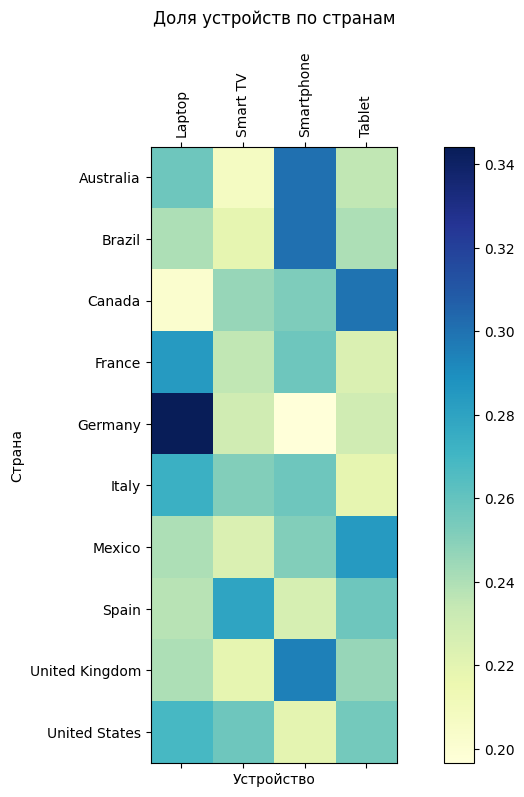

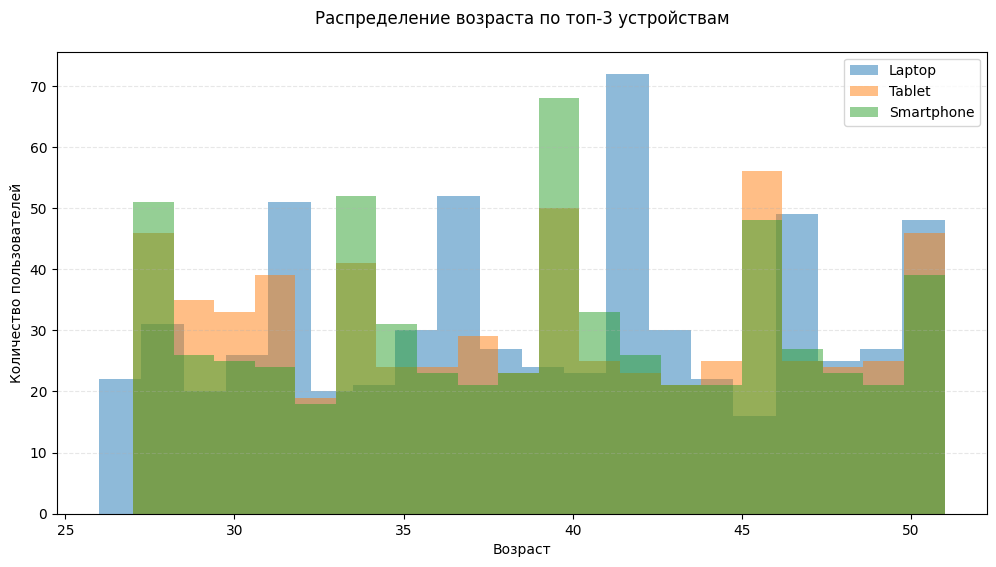

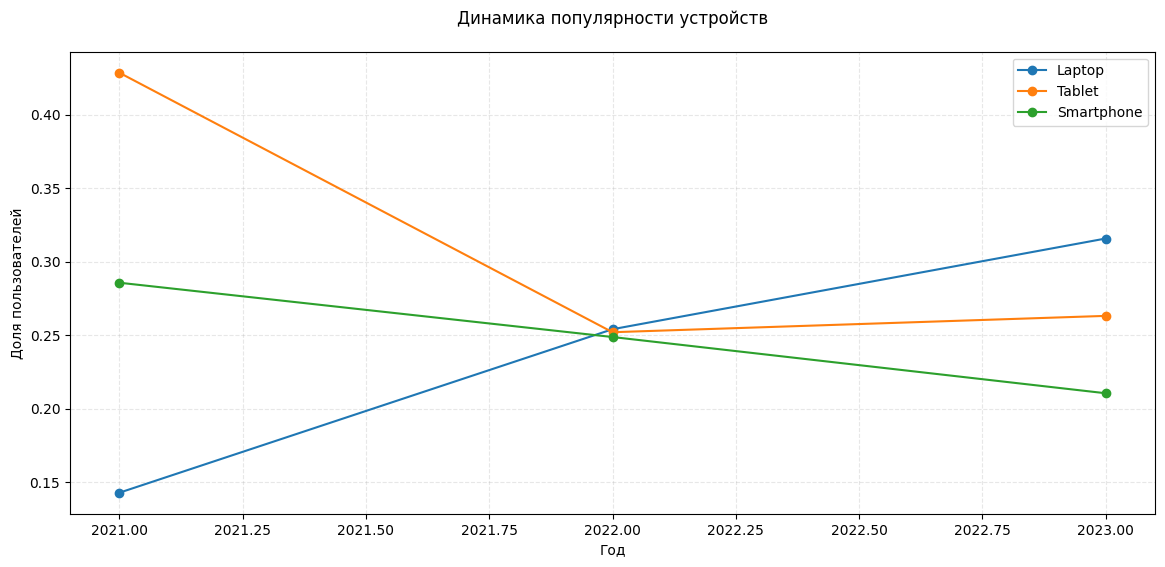

In [ ]:
# изучить девайсы пользователей (визуализировать)

# Подготовка данных
device_counts = df['device'].value_counts()
top_devices = device_counts.head(5)

# 1. Основные графики распределения устройств
plt.figure(figsize=(15, 10))

# График 1: Круговая диаграмма (топ-5 устройств)
plt.subplot(2, 2, 1)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
plt.pie(top_devices,
        labels=top_devices.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        explode=[0.05]*len(top_devices))
plt.title('Топ-5 популярных устройств', pad=20)

# График 2: Столбчатая диаграмма (все устройства)
plt.subplot(2, 2, 2)
plt.bar(device_counts.index, device_counts.values, color='#6a5acd')
plt.title('Распределение всех устройств', pad=20)
plt.xlabel('Тип устройства')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# 2. Анализ по полу
plt.subplot(2, 2, 3)
gender_device = df.groupby(['device', 'gender']).size().unstack()
gender_device = gender_device.loc[top_devices.index]  # Берем только топ-5

bottom = None
for i, gender in enumerate(gender_device.columns):
    plt.bar(gender_device.index,
            gender_device[gender],
            bottom=bottom,
            label=gender,
            color=['pink' if g == 'female' else 'lightblue' for g in gender_device.columns])
    if bottom is None:
        bottom = gender_device[gender].values
    else:
        bottom += gender_device[gender].values

plt.title('Распределение по полу (топ-5 устройств)', pad=20)
plt.xlabel('Тип устройства')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Пол')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# 3. Анализ дохода по устройствам
plt.subplot(2, 2, 4)
device_revenue = df.groupby('device')['monthlyRevenue'].mean().loc[top_devices.index]
plt.bar(device_revenue.index, device_revenue.values, color='#2e8b57')
plt.title('Средний доход по устройствам (топ-5)', pad=20)
plt.xlabel('Тип устройства')
plt.ylabel('Средний месячный доход ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# 4. Дополнительные анализы
print("\nТоп-5 устройств по количеству пользователей:")
print(top_devices)

print("\nСредний доход по устройствам:")
print(df.groupby('device')['monthlyRevenue'].mean().sort_values(ascending=False).head(5))

print("\nСредний возраст пользователей по устройствам:")
print(df.groupby('device')['age'].mean().sort_values().head(5))

plt.figure(figsize=(12, 8))
country_device = pd.crosstab(df['country'], df['device']).apply(lambda x: x/x.sum(), axis=1)

fig, ax = plt.subplots(figsize=(12, 8))
cax = ax.matshow(country_device, cmap=plt.cm.YlGnBu)
plt.colorbar(cax)

ax.set_xticks(range(len(country_device.columns)))
ax.set_yticks(range(len(country_device.index)))
ax.set_xticklabels(country_device.columns, rotation=90)
ax.set_yticklabels(country_device.index)

plt.title('Доля устройств по странам', pad=20)
plt.xlabel('Устройство')
plt.ylabel('Страна')
plt.show()

plt.figure(figsize=(12, 6))
top_devices_list = device_counts.head(3).index.tolist()
df_filtered = df[df['device'].isin(top_devices_list)]

for device in top_devices_list:
    subset = df_filtered[df_filtered['device'] == device]
    plt.hist(subset['age'], bins=20, alpha=0.5, label=device)

plt.title('Распределение возраста по топ-3 устройствам', pad=20)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

plt.figure(figsize=(14, 6))
df['joinYear'] = pd.to_datetime(df['joinDate']).dt.year
year_device = pd.crosstab(df['joinYear'], df['device']).apply(lambda x: x/x.sum(), axis=1)

for device in top_devices_list:
    plt.plot(year_device.index, year_device[device], marker='o', label=device)

plt.title('Динамика популярности устройств', pad=20)
plt.ylabel('Доля пользователей')
plt.xlabel('Год')
plt.legend()
plt.grid(linestyle='--', alpha=0.3)
plt.show()

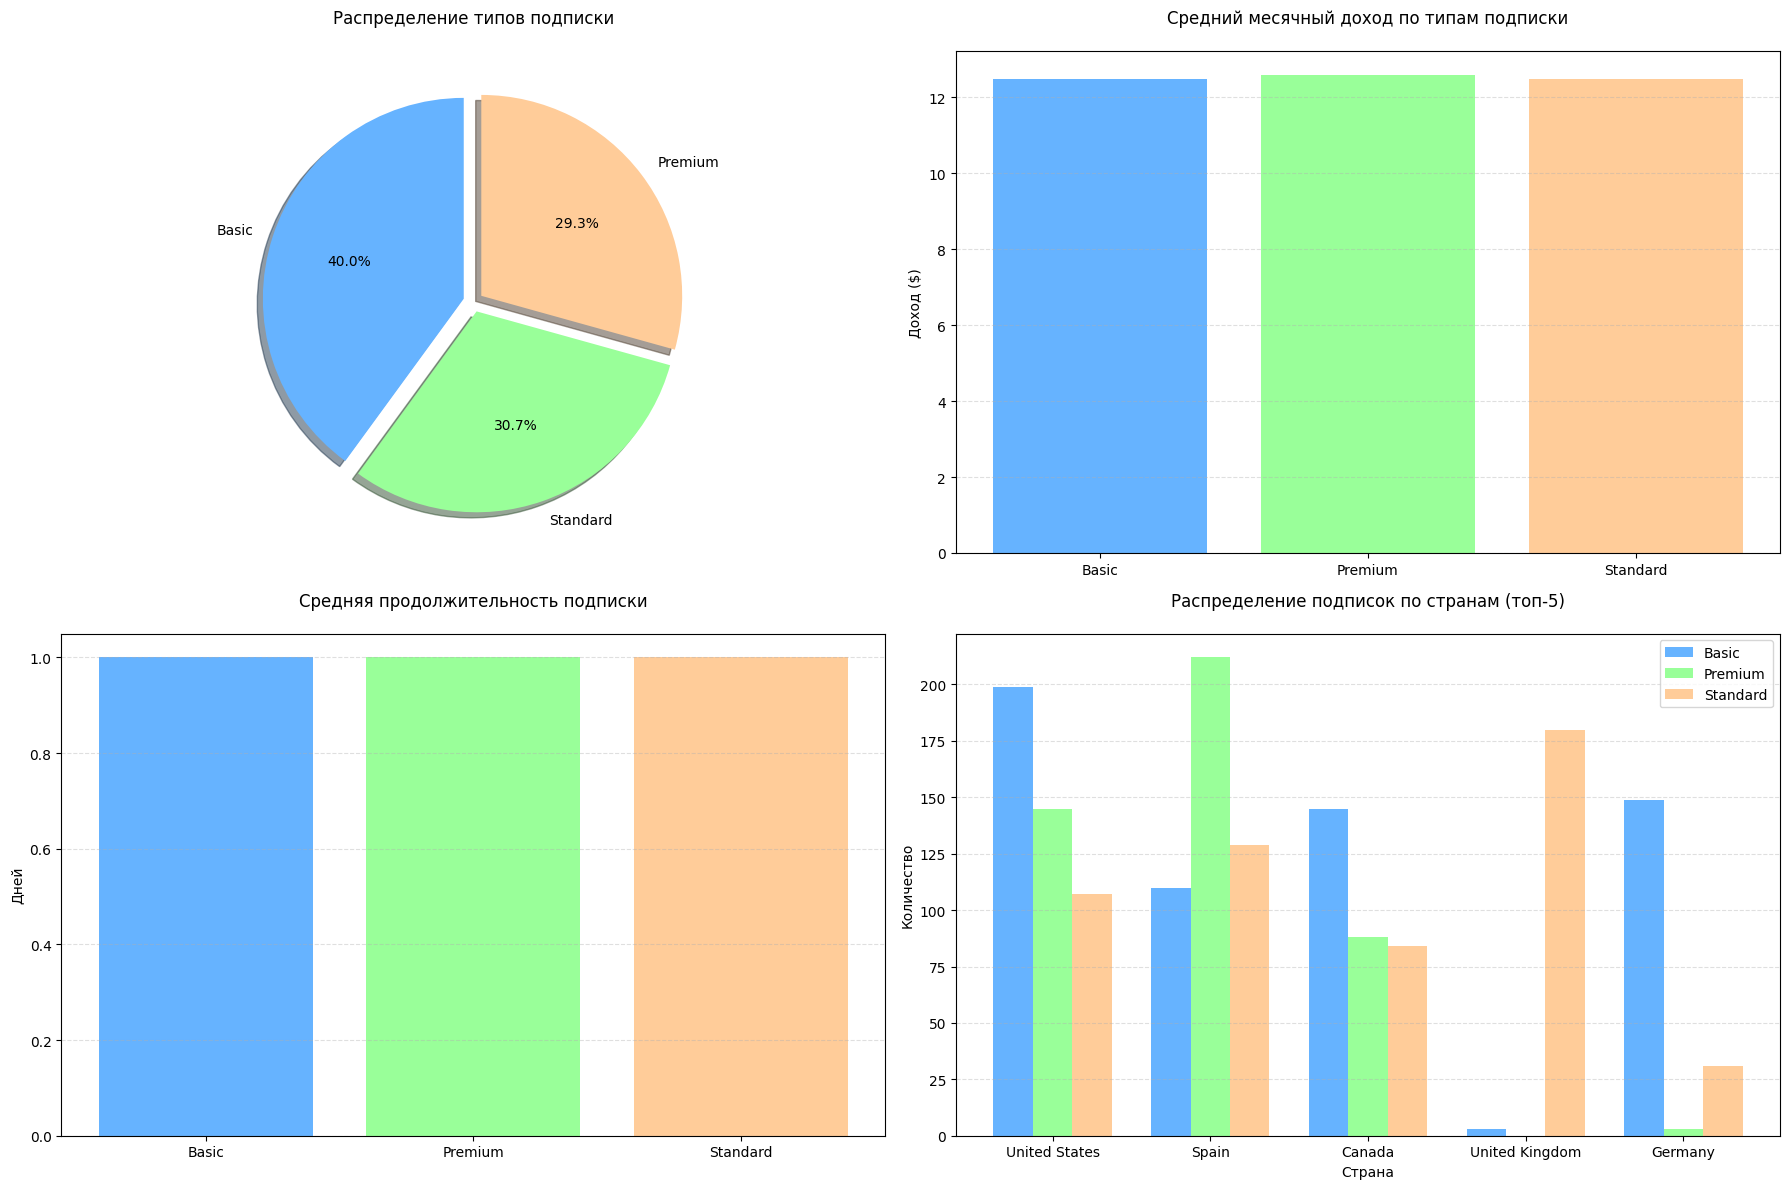


Статистика по подпискам:
subscriptionType
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

Средний доход по типам подписки:
subscriptionType
Basic       12.481481
Premium     12.590723
Standard    12.464844
Name: monthlyRevenue, dtype: float64

Средняя продолжительность подписки:
subscriptionType
Basic       1.0
Premium     1.0
Standard    1.0
Name: planDuration, dtype: float64


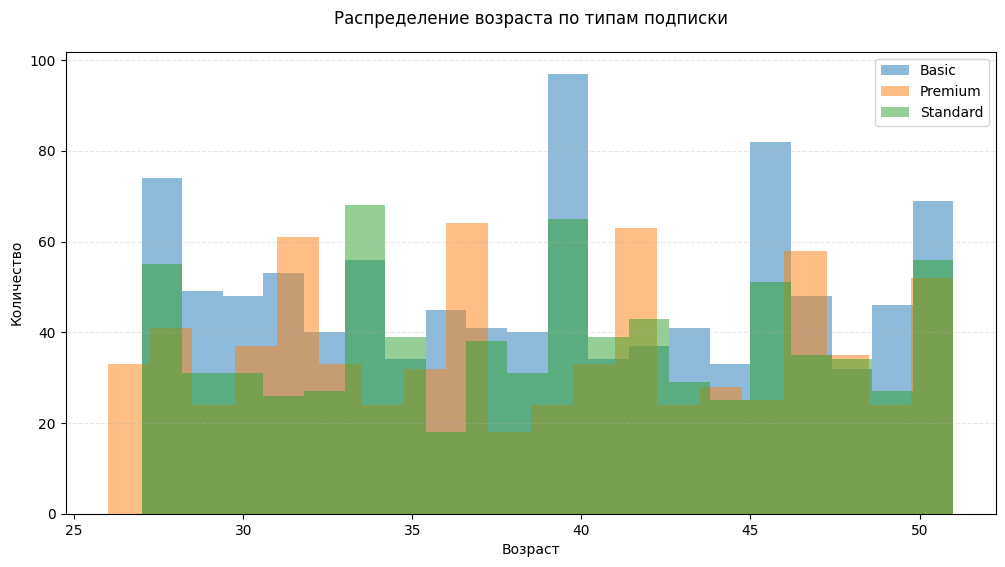

In [ ]:
# изучить тип подписки пользователей (визуализировать)

import matplotlib.pyplot as plt

# Подготовка данных
subscription_counts = df['subscriptionType'].value_counts()
revenue_by_type = df.groupby('subscriptionType')['monthlyRevenue'].mean()
duration_by_type = df.groupby('subscriptionType')['planDuration'].mean()

# Создаем фигуру с 4 графиками
plt.figure(figsize=(18, 12))

# 1. Круговая диаграмма распределения подписок
plt.subplot(2, 2, 1)
colors = ['#66b3ff', '#99ff99', '#ffcc99']
plt.pie(subscription_counts,
        labels=subscription_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        explode=[0.05]*len(subscription_counts),
        shadow=True)
plt.title('Распределение типов подписки', pad=20)

# 2. Столбчатая диаграмма среднего дохода
plt.subplot(2, 2, 2)
plt.bar(revenue_by_type.index, revenue_by_type.values, color=colors)
plt.title('Средний месячный доход по типам подписки', pad=20)
plt.ylabel('Доход ($)')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# 3. Продолжительность подписки
plt.subplot(2, 2, 3)
plt.bar(duration_by_type.index, duration_by_type.values, color=colors)
plt.title('Средняя продолжительность подписки', pad=20)
plt.ylabel('Дней')
plt.grid(axis='y', linestyle='--', alpha=0.4)

# 4. Распределение подписок по странам (топ-5 стран)
plt.subplot(2, 2, 4)
top_countries = df['country'].value_counts().head(5).index
country_subscription = pd.crosstab(df['country'], df['subscriptionType']).loc[top_countries]

width = 0.25
x = range(len(top_countries))
for i, sub_type in enumerate(country_subscription.columns):
    plt.bar([xi + width*i for xi in x],
            country_subscription[sub_type],
            width=width,
            label=sub_type,
            color=colors[i])

plt.xticks([xi + width for xi in x], top_countries)
plt.title('Распределение подписок по странам (топ-5)', pad=20)
plt.xlabel('Страна')
plt.ylabel('Количество')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

# Дополнительная аналитика
print("\nСтатистика по подпискам:")
print(subscription_counts)

print("\nСредний доход по типам подписки:")
print(revenue_by_type)

print("\nСредняя продолжительность подписки:")
print(duration_by_type)

plt.figure(figsize=(12, 6))
for sub_type in df['subscriptionType'].unique():
    subset = df[df['subscriptionType'] == sub_type]
    plt.hist(subset['age'], bins=20, alpha=0.5, label=sub_type)

plt.title('Распределение возраста по типам подписки', pad=20)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

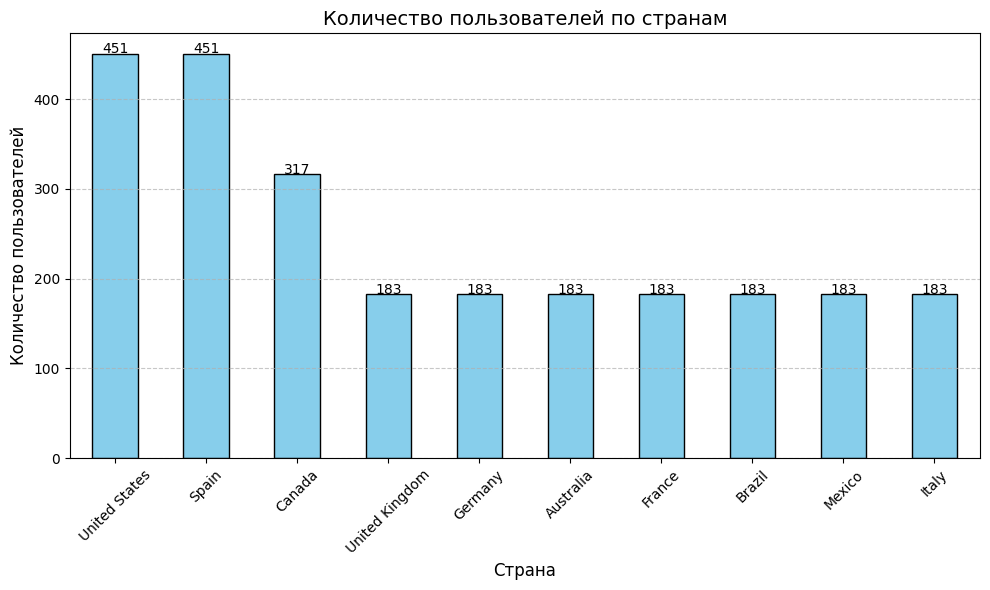

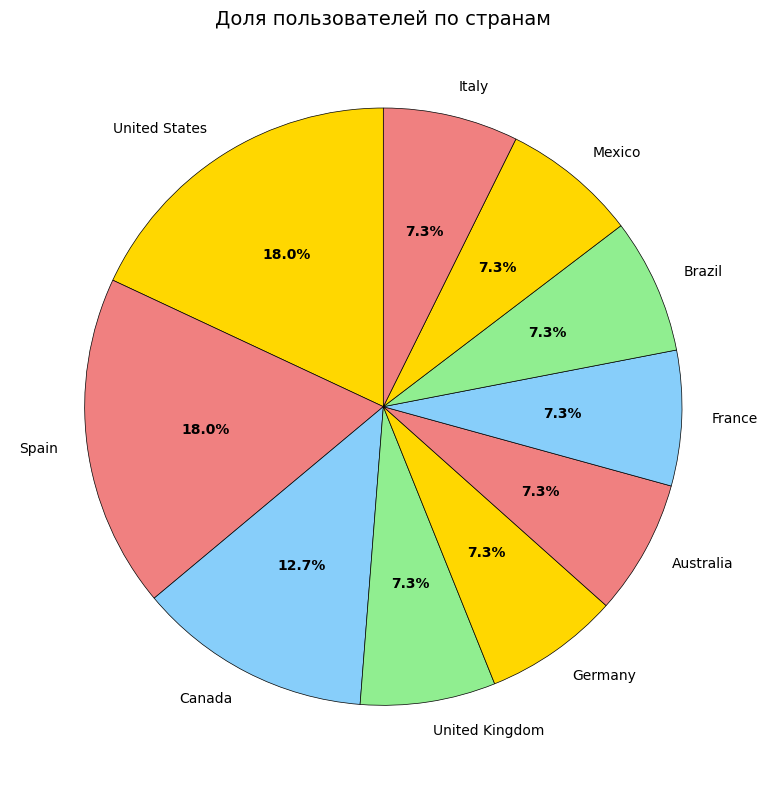

In [ ]:
# изучить локацию пользователей (визуализировать)

# Группируем по странам и считаем пользователей
country_counts = df['country'].value_counts()

# Столбчатая диаграмма
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Настройки отображения
plt.title('Количество пользователей по странам', fontsize=14)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Добавляем подписи значений
for i, count in enumerate(country_counts):
    plt.text(i, count + 0.1, str(count), ha='center')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))

# Круговая диаграмма с выносками
patches, texts, autotexts = plt.pie(
    country_counts,
    labels=country_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)

# Настройки
plt.title('Доля пользователей по странам', fontsize=14)
plt.setp(autotexts, size=10, weight='bold')  # Форматирование процентов

plt.tight_layout()
plt.show()

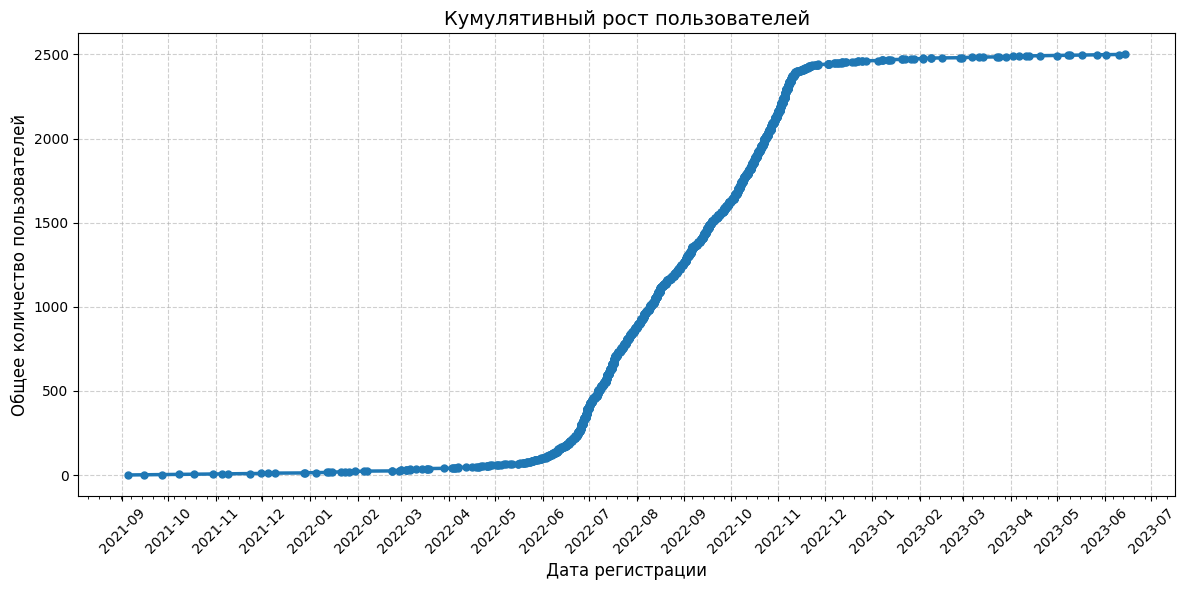

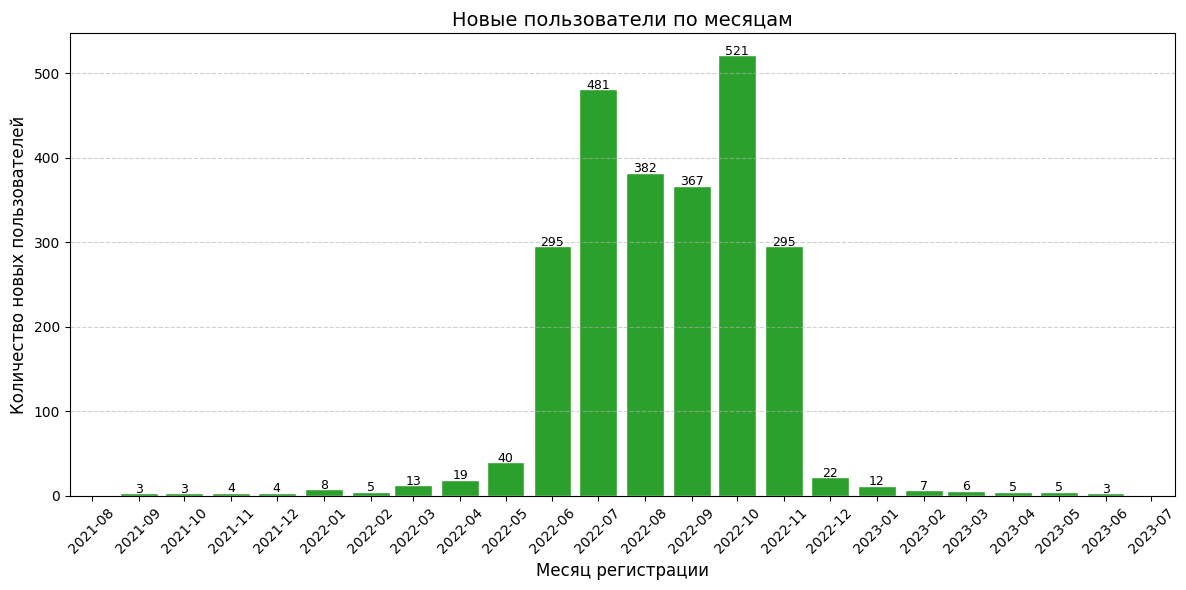

In [ ]:
# изучть динамику привлечения пользователей (Join Date)

#1. Кумулятивный рост пользователей (линейный график)

import matplotlib.dates as mdates
from datetime import datetime

# Преобразуем joinDate в datetime
df['joinDate'] = pd.to_datetime(df['joinDate'])

# 1. Кумулятивный рост пользователей (линейный график)
plt.figure(figsize=(12, 6))

# Сортируем даты и вычисляем кумулятивную сумму
sorted_dates = np.sort(df['joinDate'])
cumulative_users = np.arange(1, len(sorted_dates) + 1)

plt.plot(sorted_dates, cumulative_users,
         color='#1f77b4', linewidth=2.5, marker='o', markersize=5)

# Настройка отображения дат
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator())

plt.title('Кумулятивный рост пользователей', fontsize=14)
plt.xlabel('Дата регистрации', fontsize=12)
plt.ylabel('Общее количество пользователей', fontsize=12)
plt.grid(linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Новые пользователи по месяцам (столбчатая диаграмма)
plt.figure(figsize=(12, 6))

# Извлекаем год и месяц
df['joinYearMonth'] = df['joinDate'].dt.to_period('M').astype(str)
monthly_counts = df.groupby('joinYearMonth')['userId'].count()

# Создаем массив дат для правильного отображения на оси X
x_dates = [datetime.strptime(d, '%Y-%m') for d in monthly_counts.index]

plt.bar(x_dates, monthly_counts.values,
        width=25, color='#2ca02c', edgecolor='white')

# Добавляем значения на столбцы
for i, count in enumerate(monthly_counts.values):
    plt.text(x_dates[i], count + 0.5, str(count),
             ha='center', fontsize=9)

# Настройка осей
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Новые пользователи по месяцам', fontsize=14)
plt.xlabel('Месяц регистрации', fontsize=12)
plt.ylabel('Количество новых пользователей', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-30-a27ef87a09c9>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(min_date, max_date, freq='M')
<ipython-input-30-a27ef87a09c9>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  user_months = pd.date_range(


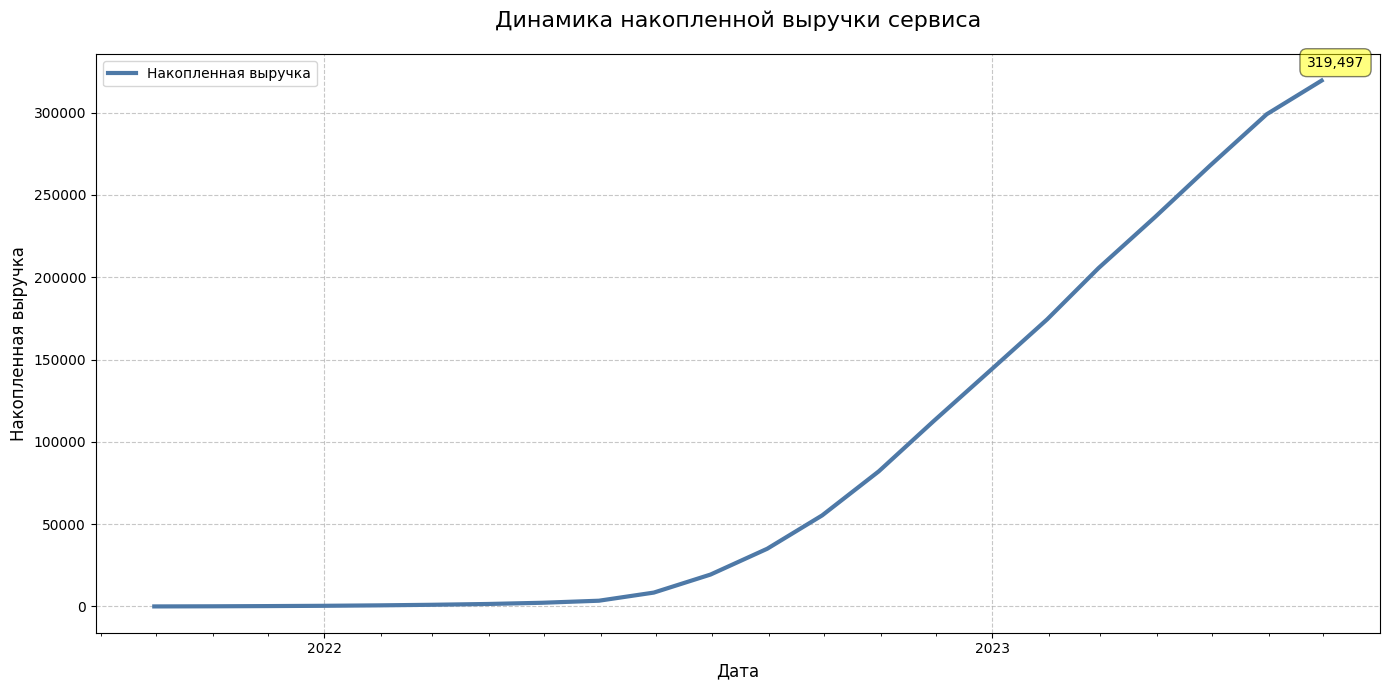

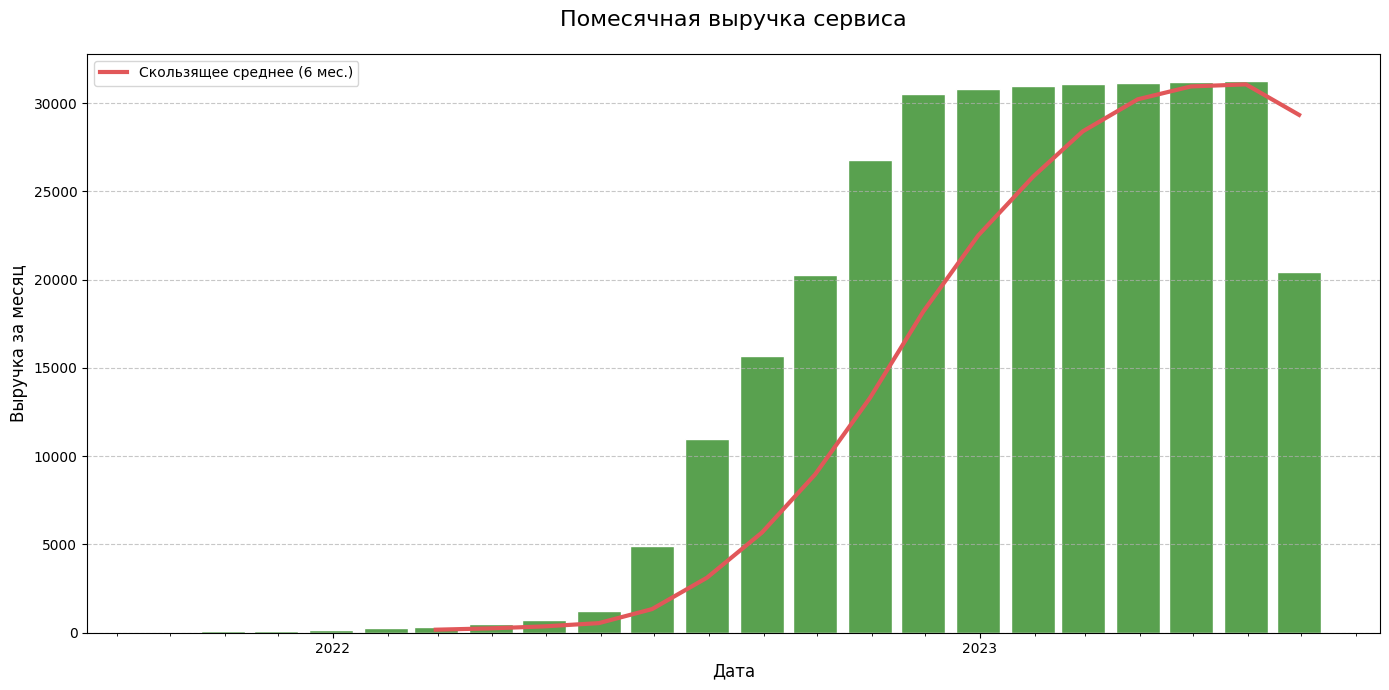

In [ ]:
# изучть динамику выручки сервиса (накопленное Monthly Revenue по месяцу с момента Join Date до момента Last Payment Date)

df['lastPaymentDate'] = pd.to_datetime(df['lastPaymentDate'])

# 1. Подготовка данных: создаем временной ряд выручки
min_date = df['joinDate'].min().to_period('M').to_timestamp()
max_date = df['lastPaymentDate'].max().to_period('M').to_timestamp()
date_range = pd.date_range(min_date, max_date, freq='M')

# Создаем DataFrame для хранения накопленной выручки
revenue_df = pd.DataFrame(index=date_range, columns=['cumulative_revenue'])
revenue_df['cumulative_revenue'] = 0

# 2. Расчет накопленной выручки по месяцам
for _, row in df.iterrows():
    # Определяем период активности пользователя
    user_months = pd.date_range(
        start=row['joinDate'].to_period('M').to_timestamp(),
        end=row['lastPaymentDate'].to_period('M').to_timestamp(),
        freq='M'
    )

    # Добавляем monthlyRevenue для каждого месяца активности
    for month in user_months:
        if month in revenue_df.index:
            revenue_df.loc[month, 'cumulative_revenue'] += row['monthlyRevenue']

# Накопленная сумма
revenue_df['cumulative_revenue'] = revenue_df['cumulative_revenue'].cumsum()

# 3. Визуализация накопленной выручки
plt.figure(figsize=(14, 7))

# Основной график
plt.plot(revenue_df.index, revenue_df['cumulative_revenue'],
         color='#4e79a7', linewidth=3, label='Накопленная выручка')

# Настройка осей
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Аннотация последнего значения
last_value = revenue_df['cumulative_revenue'].iloc[-1]
last_date = revenue_df.index[-1]
plt.annotate(f'{last_value:,.0f}',
             xy=(last_date, last_value),
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             ha='center')

plt.title('Динамика накопленной выручки сервиса', fontsize=16, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Накопленная выручка', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.tight_layout()

# 4. Дополнительно: помесячная выручка (столбчатая диаграмма)
plt.figure(figsize=(14, 7))

# Расчет помесячной выручки (не накопленной)
monthly_revenue = revenue_df['cumulative_revenue'].diff().fillna(revenue_df['cumulative_revenue'].iloc[0])

# Столбчатая диаграмма
bars = plt.bar(monthly_revenue.index, monthly_revenue,
               width=25, color='#59a14f', edgecolor='white')

# Линия тренда (скользящее среднее)
window_size = 6
rolling_avg = monthly_revenue.rolling(window=window_size).mean()
plt.plot(rolling_avg.index, rolling_avg,
         color='#e15759', linewidth=3,
         label=f'Скользящее среднее ({window_size} мес.)')

# Настройки
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

plt.title('Помесячная выручка сервиса', fontsize=16, pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Выручка за месяц', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


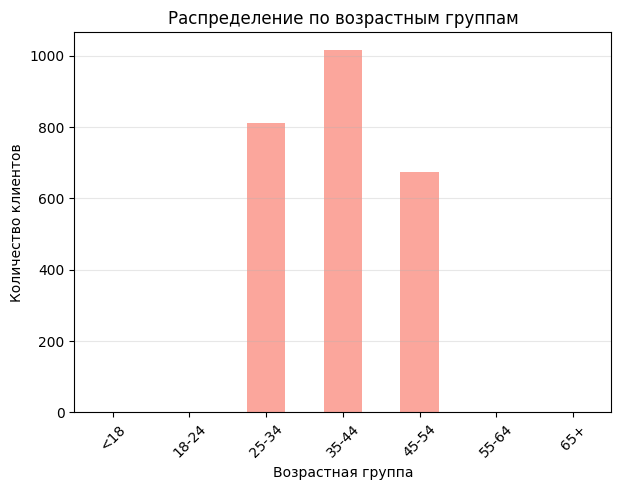

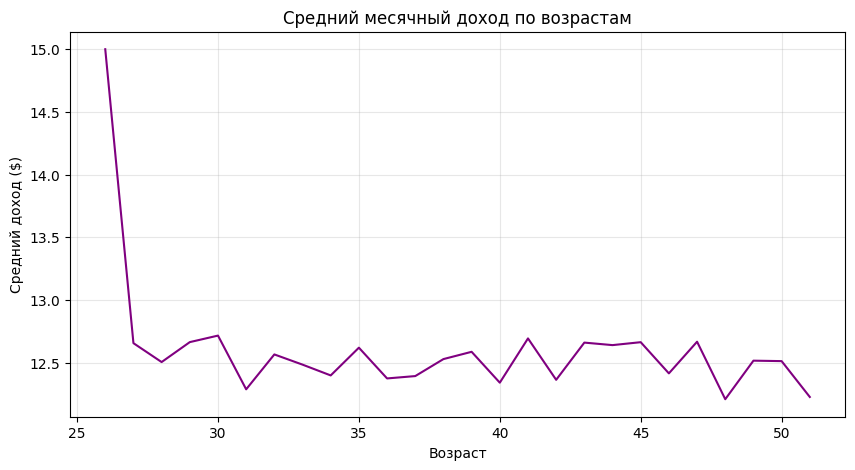

In [ ]:
# разбить клиентов на корзины по возрасту и определить самую платежеспособную группу

plt.figure(figsize=(18, 5))

# Распределение по возрастным группам
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

age_group_counts = df['age_group'].value_counts().sort_index()
plt.subplot(1, 3, 3)
age_group_counts.plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Распределение по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Дополнительно: средний доход по возрастам
plt.figure(figsize=(10, 5))
df.groupby('age')['monthlyRevenue'].mean().plot(color='purple')
plt.title('Средний месячный доход по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Средний доход ($)')
plt.grid(alpha=0.3)
plt.show()

<ipython-input-33-33e932067d13>:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(


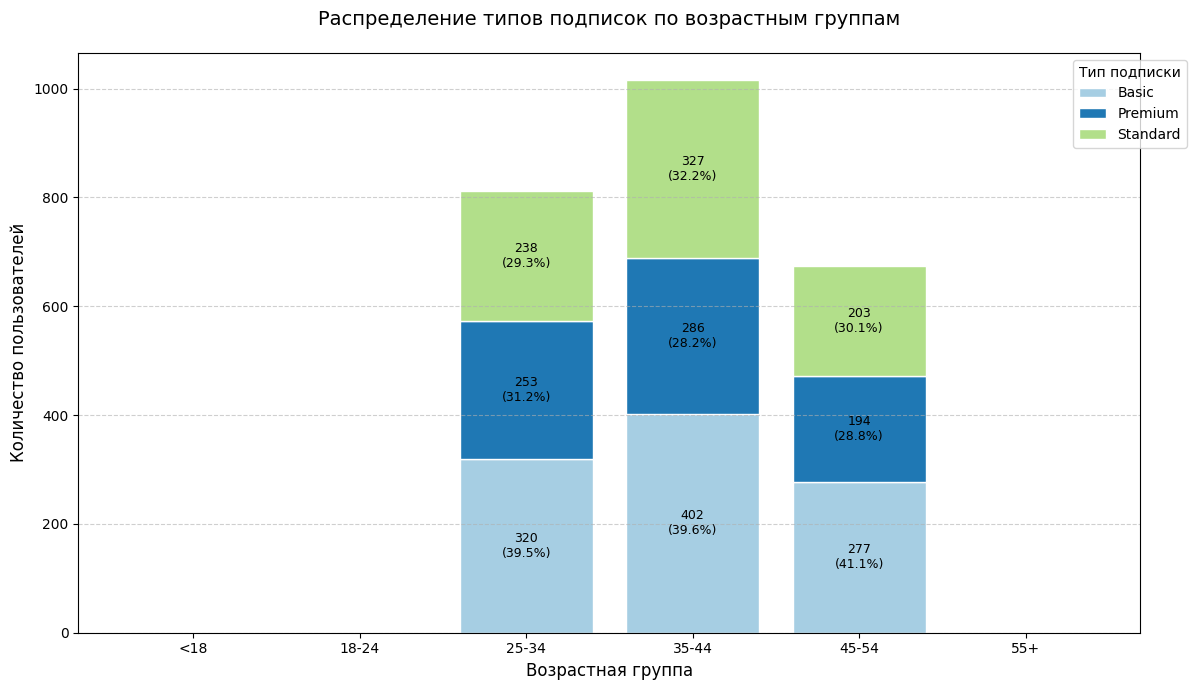

In [ ]:
# посмотреть зависимость типа тарифа от группы возраста пользователя

# Создаем возрастные группы
bins = [0, 18, 25, 35, 45, 55, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# 1. Подготовка данных: сводная таблица
pivot_table = pd.pivot_table(
    df,
    index='age_group',
    columns='subscriptionType',
    values='userId',
    aggfunc='count',
    fill_value=0
)

# Нормируем данные для процентного представления
pivot_percent = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# 2. Визуализация (столбчатая диаграмма с накоплением)
plt.figure(figsize=(12, 7))

# Цвета для разных типов подписок
colors = plt.cm.Paired.colors[:len(pivot_table.columns)]

# Построение stacked bar plot
bottom = np.zeros(len(pivot_table))
for i, subscription_type in enumerate(pivot_table.columns):
    plt.bar(
        pivot_table.index,
        pivot_table[subscription_type],
        bottom=bottom,
        label=subscription_type,
        color=colors[i],
        edgecolor='white',
        width=0.8
    )
    bottom += pivot_table[subscription_type]

# Добавление значений
for age_group in pivot_table.index:
    total = pivot_table.loc[age_group].sum()
    current_bottom = 0
    for subscription_type in pivot_table.columns:
        value = pivot_table.loc[age_group, subscription_type]
        if value > 0:
            plt.text(
                age_group,
                current_bottom + value/2,
                f'{value}\n({pivot_percent.loc[age_group, subscription_type]:.1f}%)',
                ha='center',
                va='center',
                color='black',
                fontsize=9
            )
        current_bottom += value

plt.title('Распределение типов подписок по возрастным группам', fontsize=14, pad=20)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.legend(title='Тип подписки', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

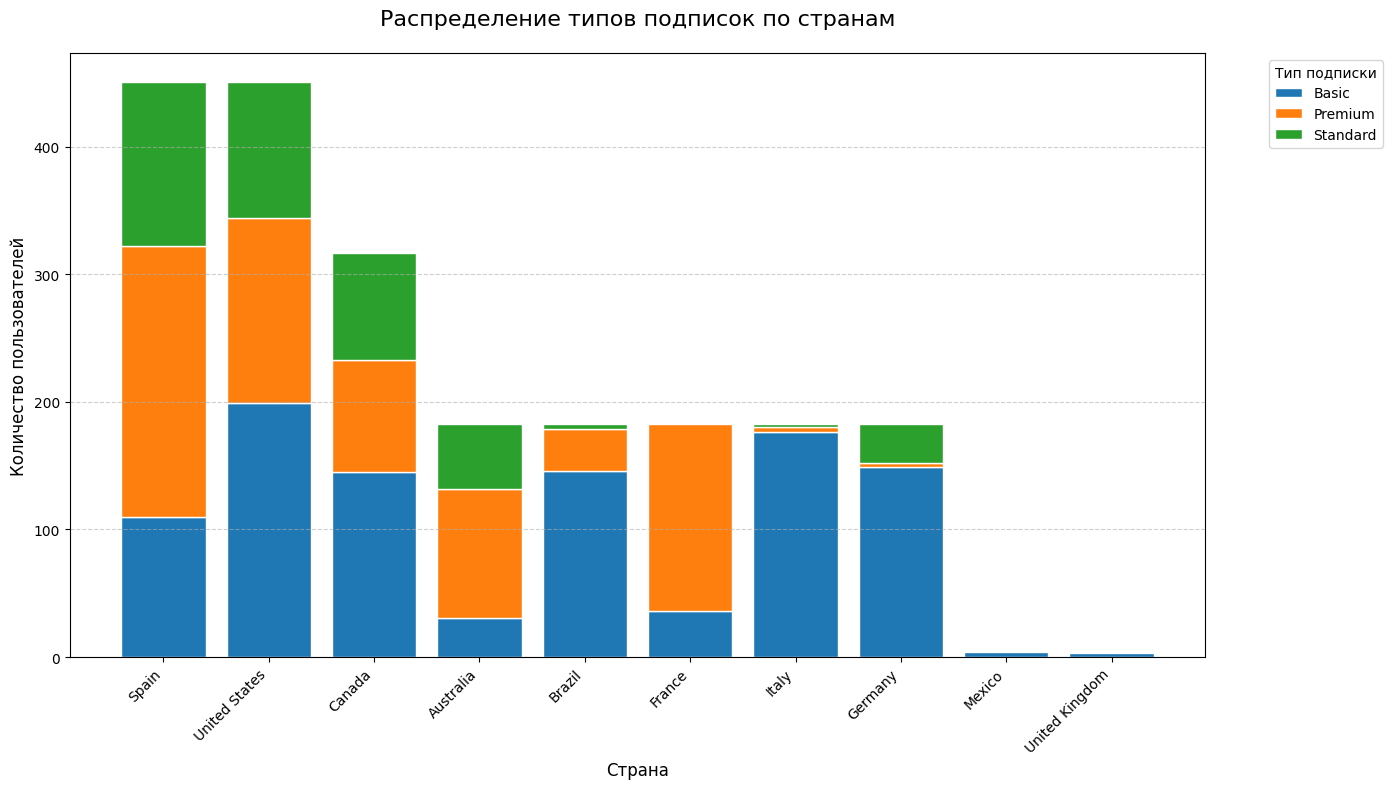

In [ ]:
# посмотреть зависимость типа тарифа от страны пользователя

# 1. Подготовка данных
# Группируем по стране и типу подписки
subscription_by_country = df.groupby(['country', 'subscriptionType'])['userId'].count().unstack()

# Сортируем страны по общему количеству пользователей
subscription_by_country = subscription_by_country.loc[subscription_by_country.sum(axis=1).sort_values(ascending=False).index]

# Нормированные данные (проценты)
subscription_percent = subscription_by_country.div(subscription_by_country.sum(axis=1), axis=0) * 100

# 2. Визуализация - Stacked Bar Plot (абсолютные значения)
plt.figure(figsize=(14, 8))

# Цвета для разных типов подписок
colors = plt.cm.tab10.colors[:len(subscription_by_country.columns)]

bottom = np.zeros(len(subscription_by_country))
for i, subscription in enumerate(subscription_by_country.columns):
    plt.bar(
        subscription_by_country.index,
        subscription_by_country[subscription],
        bottom=bottom,
        label=subscription,
        color=colors[i],
        width=0.8,
        edgecolor='white'
    )
    bottom += subscription_by_country[subscription]

plt.title('Распределение типов подписок по странам', fontsize=16, pad=20)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Тип подписки', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Выводы

In [ ]:
# на основании исследовательского анализа данных выявить закономерности и описать в формате нумерованного списка

1 всего 2500 пользователей

2 возраст пользователей от 27 до 51 лет с преобладаним 31, 36, 41, 46 лет, среди которых самые обеспеченные 26-и летние

3 половое распределение в процентах примерно равнозначное 50.3 и 49.7 с одинаковым среднемесячным доходом

4 по используемым усторйствам клиенты распределились фактически поровну, есть перевес в сторону Laptop и Tablet не превышающий 1%

5 наиболее популярна подписка Basic, затем Standart и Premium

6 по количеству пользователей больше всего подписчиков в United States, далее Spain, Canada, далее спад подписчиков в 2 раза

7 существенный рост подписчков наблюдался с июня по ноябрь 2022

8 выручка росла аналогично росту числа подписчиков

9 наиболее платежеспособные почписчики это возрастная группа в возрасте 35-44 лет

10 тарифы выбираемые разными возрастными пользователями сервиса
	35-34	35-44	45-54
Basic	39.5%	39.6%	41.1%
Premium	25.3%	28.2%	28.8%
Standat	29.3%	32.2%	30.1%
в любом случае тариф Basic наиболее препочтителен

11 тарифы выбираемые жителями разных стран пользователями сервиса
	Spain, France это Premium
	Unaited States, Canada, Brazil, Italy, Germany это Basic
тариф Standart выбирается реже всего